In [293]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score



df_full = pd.read_csv('Data Workshop 1 Apr 6 2023.csv')
#make dataset of all liquid fill records
df_liq = df_full[df_full['DryFillOpRequired']== 0] 
#make dataset that only includes failures
df_liq_fail = df_liq[(df_liq['InspectStationWeighCheckPassFail']==2 )| (df_liq['InspectStationVisionPassFail']==2)]
#split failures into fillstation 3 
df_liq3 = df_liq_fail[(df_liq_fail['WetFillStation3OpRequired']==1)]
#split into data that has a weight failure
df_w = df_liq3[df_liq3['InspectStationWeighCheckPassFail']==2]



In [294]:
#filtor out the data columns we want
df_liq3 = df_w.filter(['WetFillStation3VolumeDispTank1','WetFillStation3VolumeDispTank2','WetFillStation3VolumeDispTank3','WetFillStation3VolumeDispTank4','WetFillStation3VolumeReqTank1','WetFillStation3VolumeReqTank2','WetFillStation3VolumeReqTank3','WetFillStation3VolumeReqTank4','InspectStationVisionVialRGBBlue','InspectStationVisionVialRGBBluLower','InspectStationVisionVialRGBBluUpper','InspectStationVisionVialRGBGre','InspectStationVisionVialRGBGreLower','InspectStationVisionVialRGBGreUpper','InspectStationVisionVialRGBRed','InspectStationVisionVialRGBRedLower','InspectStationVisionVialRGBRedUpper','InspectStationVisionPassFail','VialEmptyWeight','InspectStationWeighCheckData','InspectStationWeighCheckPassFail','InspectStationWeighCheckLowerLimit','InspectStationWeighCheckUpperLimit'],axis=1)
#copy recipe 3 failures that did not complete vision inspection
df_nid = df_liq3[df_liq3.InspectStationVisionPassFail == 0]
#separate data that did not pass visual inspection from data
df_liq3 = df_liq3[df_liq3.InspectStationVisionPassFail != 0]


In [295]:
#split the training and test data
y = df_liq3['InspectStationVisionPassFail'].values
y=sklearn.preprocessing.binarize(y.reshape(-1,1) , threshold=1.1, copy=False)# make y binary 
x = df_liq3.drop(['InspectStationVisionPassFail'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0,stratify=y)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 12 rows
Test Set: 3 rows


In [296]:
# Train the LR model

# Fit a linear regression model on the training set
modelLR = LogisticRegression().fit(X_train, y_train)
print (modelLR)

#make predictions
predictionsLR = modelLR.predict(X_test)
np.set_printoptions(suppress=True)

LogisticRegression()


/Users/ianbrown/anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 0]
Confusion matrix for the test set:


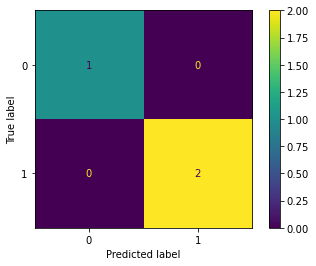

In [297]:
print (predictionsLR)

cm = confusion_matrix(y_test, predictionsLR, normalize=None)
print("Confusion matrix for the test set:")

disp = ConfusionMatrixDisplay(confusion_matrix=cm) 

disp.plot()
plt.savefig('confusion_matrix.jpg')
plt.show()

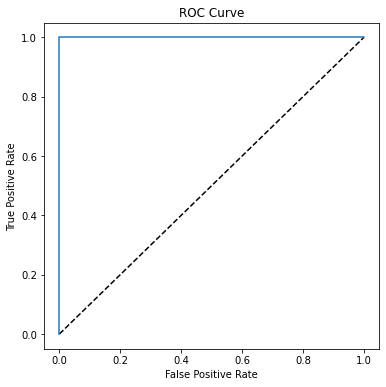

Accuracy:  1.0
Overall Precision: 1.0
Overall Recall: 1.0
AUC: 1.0


In [298]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictionsLR)

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig('ROC_plot.jpg')
plt.show()


print('Accuracy: ', accuracy_score(y_test, predictionsLR))
print("Overall Precision:",precision_score(y_test, predictionsLR))
print("Overall Recall:",recall_score(y_test, predictionsLR))

auc = roc_auc_score(y_test,predictionsLR)
print('AUC: ' + str(auc))